#Libraries Needed

In [3]:
!pip install pycountry

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pycountry

#Explore Data

In [5]:
data = pd.read_csv("mission_launches.csv")

In [6]:
data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2299,2299,2299,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA","Wed Nov 17, 1982 21:22 UTC",Titan IIID | KH-11,StatusRetired,NaN,Success
3784,3784,3784,RVSN USSR,"Site 81/23, Baikonur Cosmodrome, Kazakhstan","Sat Apr 08, 1967 09:00 UTC",Proton K/Block D | Cosmos 154,StatusRetired,NaN,Partial Failure
645,645,645,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Fri Jun 01, 2012 05:22 UTC",Zenit-3 SL | Intelsat-19,StatusActive,NaN,Success
520,520,520,ULA,"SLC-2W, Vandenberg AFB, California, USA","Sat Jan 31, 2015 14:22 UTC",Delta II 7320-10C | SMAP / ELaNa X,StatusRetired,NaN,Success
2005,2005,2005,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Thu Mar 26, 1987 21:22 UTC",Atlas-G Centaur-D1AR | FLTSATCOM-6,StatusRetired,NaN,Failure


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


#Cleaning Data & More Exploring


In [8]:
data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
data['Year'] = data['Date'].apply(lambda datetime: datetime.year)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020


In [9]:
data['Month'] = data['Date'].apply(lambda datetime: datetime.month)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
 9   Year            4324 non-null   int64 
 10  Month           4324 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 371.7+ KB


In [11]:
data.duplicated().values.sum()

0

In [12]:
data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Year                 0
Month                0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
Year              0
Month             0
dtype: int64

In [15]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Year', 'Month'],
      dtype='object')

In [16]:
# Remove chars from string
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = pd.to_numeric(data['Price'])

In [17]:
data['Price'].describe().round(2)

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max      5000.00
Name: Price, dtype: float64

In [18]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [19]:
data['Location'].value_counts()

LC-39A, Kennedy Space Center, Florida, USA                                                 120
ELA-3, Guiana Space Centre, French Guiana, France                                           78
SLC-41, Cape Canaveral AFS, Florida, USA                                                    69
SLC-40, Cape Canaveral AFS, Florida, USA                                                    60
LC-39B, Kennedy Space Center, Florida, USA                                                  52
First Launch Pad, Satish Dhawan Space Centre, India                                         41
LC-2, Xichang Satellite Launch Center, China                                                35
Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China                                   35
SLC-4W, Vandenberg AFB, California, USA                                                     35
Site 133/3, Plesetsk Cosmodrome, Russia                                                     31
LA-Y1, Tanegashima Space Center, Japan            

In [20]:
print(pycountry.countries.search_fuzzy('North Korea'))

[Country(alpha_2='KP', alpha_3='PRK', common_name='North Korea', flag='🇰🇵', name="Korea, Democratic People's Republic of", numeric='408', official_name="Democratic People's Republic of Korea")]


In [21]:
data["Country"] = data["Location"].str.split(", ").str[-1]
list_countries = {'Gran Canaria': 'United States',
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'United States',
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
                'Yellow Sea': 'China',
                'New Mexico': 'United States',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': 'Korea, Democratic People\'s Republic of',
                'Pacific Ocean': 'United States Minor Outlying Islands',
                'South Korea': 'Korea, Republic of',
                'USA' : 'United States' }
for country in list_countries:
    data.Country = data.Country.replace(country, list_countries[country])

data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,7,China


In [22]:
# Convert Country to alpha3 type
def convert_country_to_alpha3(country):
    return pycountry.countries.get(name=country).alpha_3


# Apply Function to the Dataframe
data['Alpha3_code'] = data['Country'].apply(convert_country_to_alpha3)

# print dataframe
data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country,Alpha3_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,7,China,CHN


In [26]:
organisations = data["Organisation"].value_counts()
organisations

CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
Sandia               1
Virgin Orbit         1
ESA                  1
ExPace               1
EER                  1
Name: Organisation, dtype: int64

# Data for Visualisation

**Mission Status**

In [23]:
mission_status = data['Mission_Status'].value_counts()
mission_status

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

In [24]:
fig = px.pie(data, names=mission_status.index, values=mission_status.values,
             title='Mission Status',
             color_discrete_sequence=px.colors.diverging.BrBG)
fig.update_layout()
fig.show()


**Have space missions gotten safer or has the chance of failure unchanged?**

In [25]:

fig = px.scatter(x=data['Year'], y=data['Mission_Status'])
fig.update_layout(xaxis_title="Years",
                  yaxis_title="Mission Status")
fig.show()

**Who launched the most missions in any given year?**

In [27]:
successful_missions = data[data["Mission_Status"] == "Success"]
successful_missions

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country,Alpha3_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,7,China,CHN
...,...,...,...,...,...,...,...,...,...,...,...
3839,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-09-28 19:12:00+00:00,Titan IIIB | OPS 4096,StatusRetired,59.00,Success,1966,9,United States,USA
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,1966,7,United States,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1965,5,United States,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,1965,2,United States,USA


In [28]:
successful_missions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 4000
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    910 non-null    object 
 1   Location        910 non-null    object 
 2   Date            910 non-null    object 
 3   Detail          910 non-null    object 
 4   Rocket_Status   910 non-null    object 
 5   Price           910 non-null    float64
 6   Mission_Status  910 non-null    object 
 7   Year            910 non-null    int64  
 8   Month           910 non-null    int64  
 9   Country         910 non-null    object 
 10  Alpha3_code     910 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 85.3+ KB


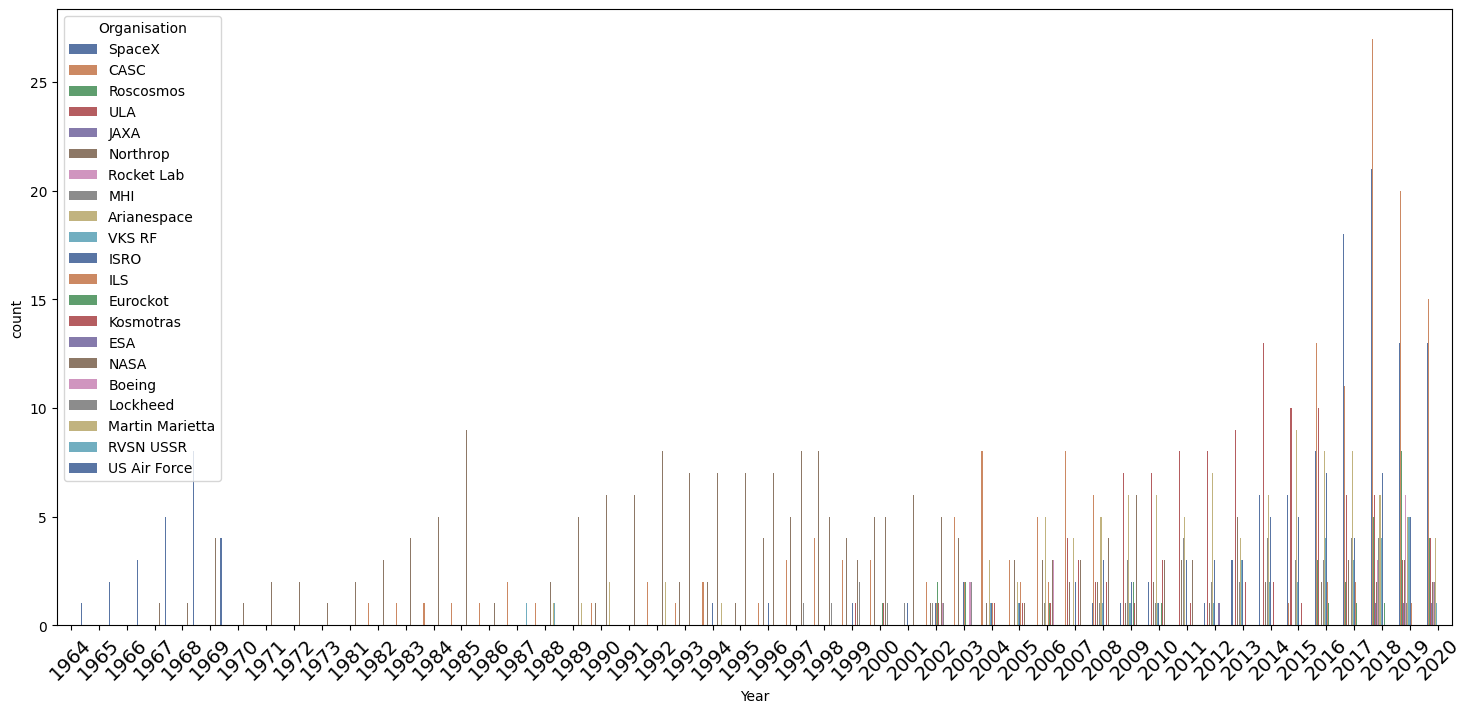

In [29]:

plt.figure(figsize=(18, 8))
plt.xticks(fontsize=14, rotation=45)

sns.countplot(data=successful_missions, x='Year', hue='Organisation',
              palette='deep')

plt.show()

**Organisations Plot**

In [30]:
successful_orgs = successful_missions['Organisation'].value_counts()
successful_orgs

CASC               152
NASA               146
ULA                 97
SpaceX              93
Arianespace         93
Northrop            74
ISRO                59
MHI                 37
VKS RF              30
US Air Force        23
Roscosmos           22
Kosmotras           21
ILS                 13
Eurockot            12
Rocket Lab          11
Lockheed             8
Martin Marietta      7
Boeing               6
JAXA                 3
RVSN USSR            2
ESA                  1
Name: Organisation, dtype: int64

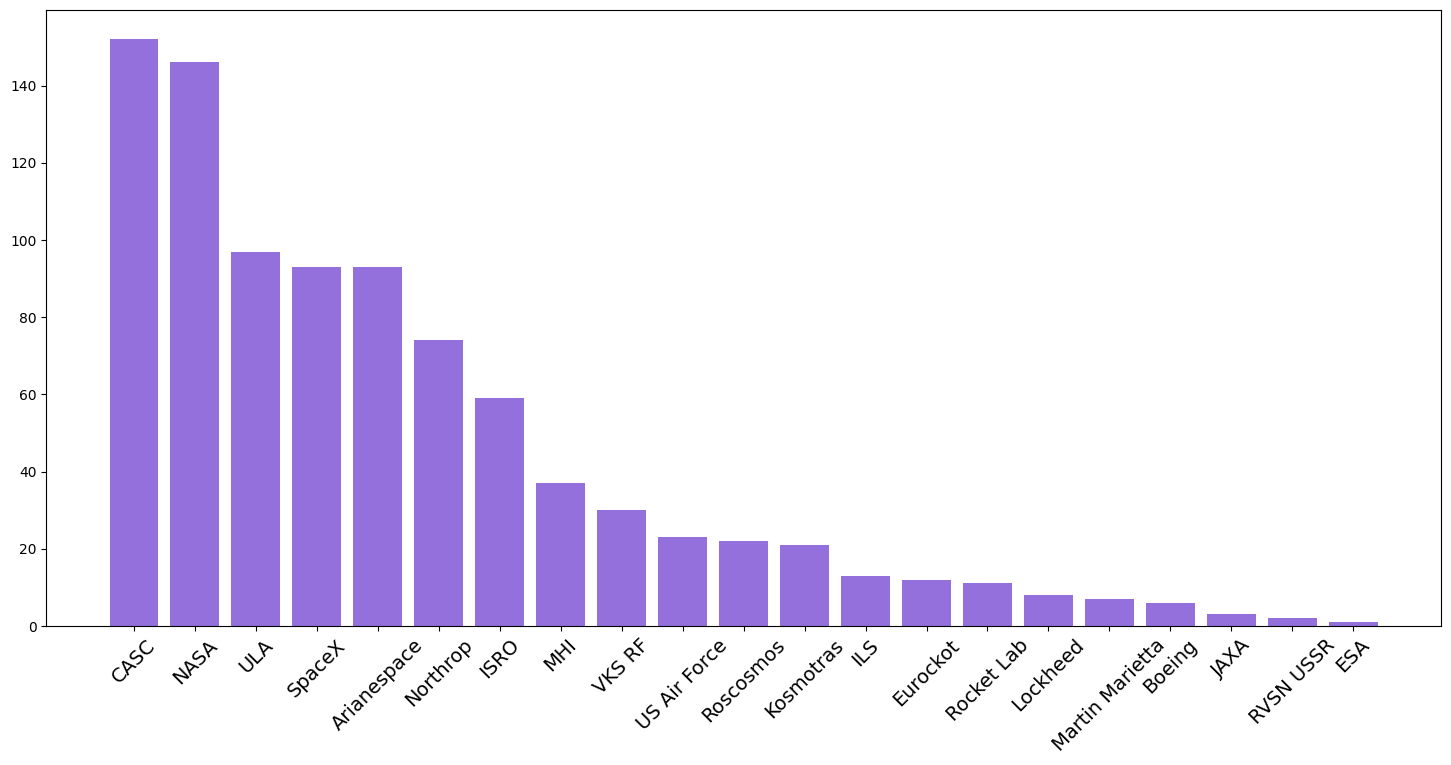

In [31]:
plt.figure(figsize=(18, 8))
plt.xticks(fontsize=14, rotation=45)

plt.bar(x=successful_orgs.index, height=successful_orgs.values,
        color='mediumpurple')

plt.show()

**Years Plot**

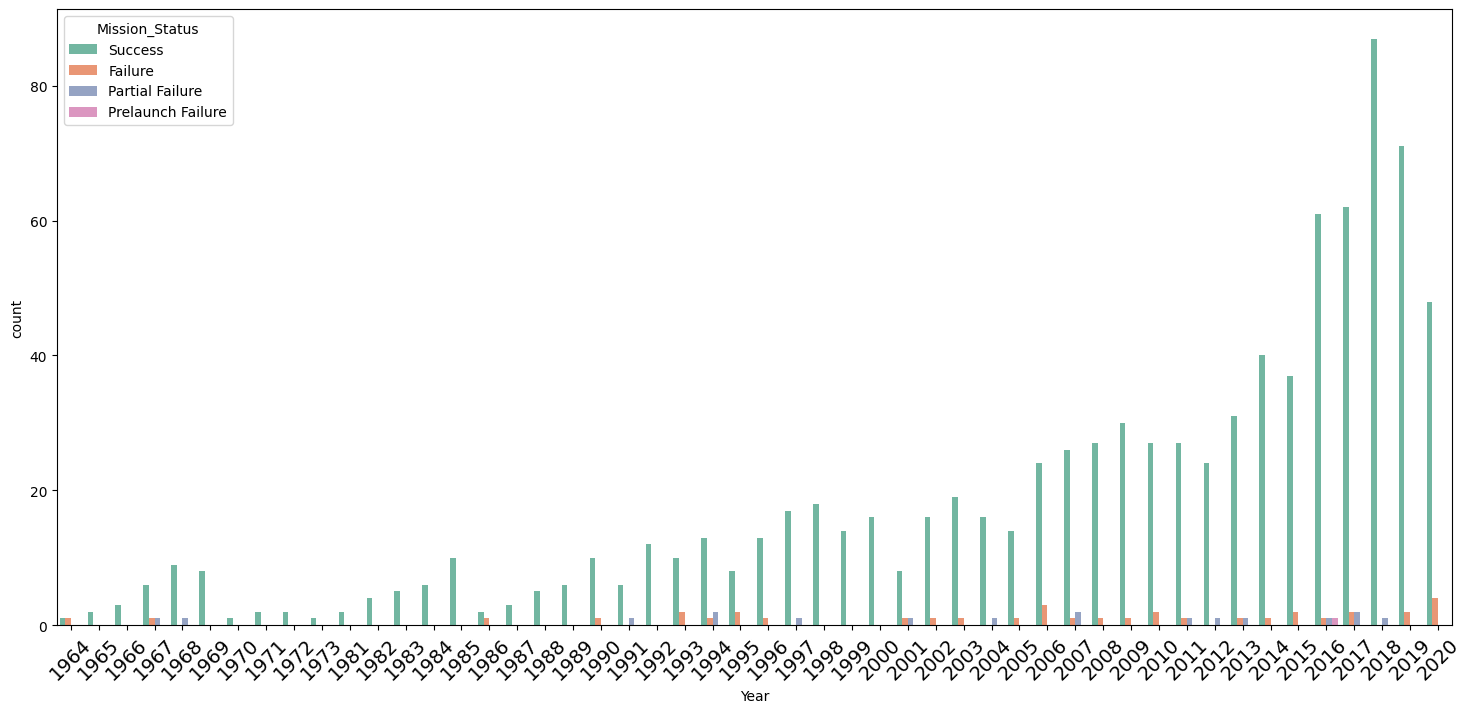

In [32]:
plt.figure(figsize=(18, 8))
plt.xticks(fontsize=14, rotation=45)

sns.countplot(data=data, x='Year', hue='Mission_Status',
              palette='Set2')

plt.show()

**Sunburst for Mission Status, Years and Oragnisations**

In [51]:
plt.figure(figsize=(18, 8), dpi=200)

fig = px.sunburst(data_frame=data, path=['Mission_Status', 'Year', 'Organisation', ],
                  values='Price')
fig.show()

<Figure size 3600x1600 with 0 Axes>

**Sunburst for Countries, Organisations and Mission Status**

In [34]:
plt.figure(figsize=(18, 8), dpi=200)

fig = px.sunburst(data_frame=data, path=['Country', 'Organisation', 'Mission_Status'],
                  values='Price')
fig.show()

<Figure size 3600x1600 with 0 Axes>

**How has the cost of a space mission varied over time?**

In [35]:
# print(data.Price.max())
# print(data.Price.min())
price_by_year = data.groupby('Year').agg({'Price': pd.Series.sum})
price_by_year

,Price
Year,
1964,126.46
1965,126.46
1966,177.00
1967,1573.00
1968,2792.00
1969,4876.00
1970,1160.00
1971,2320.00
1972,2320.00


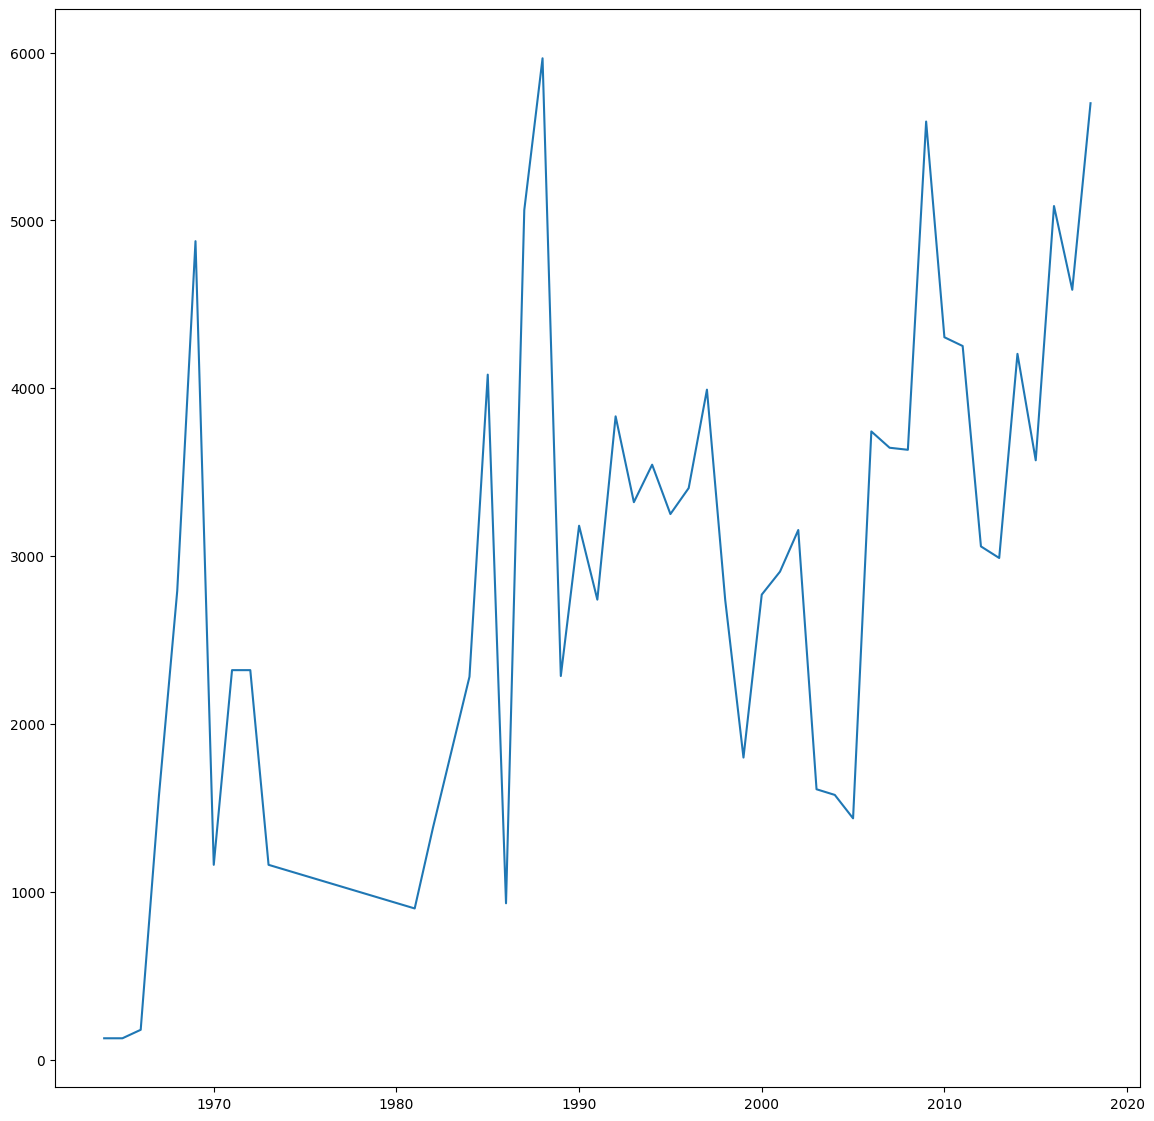

In [36]:

plt.figure(figsize=(14, 14))

plt.plot(price_by_year.index[:-2], price_by_year.values[:-2])

plt.show()

**How expensive are the launches?**
(Histogram: showing frequency distributions.)

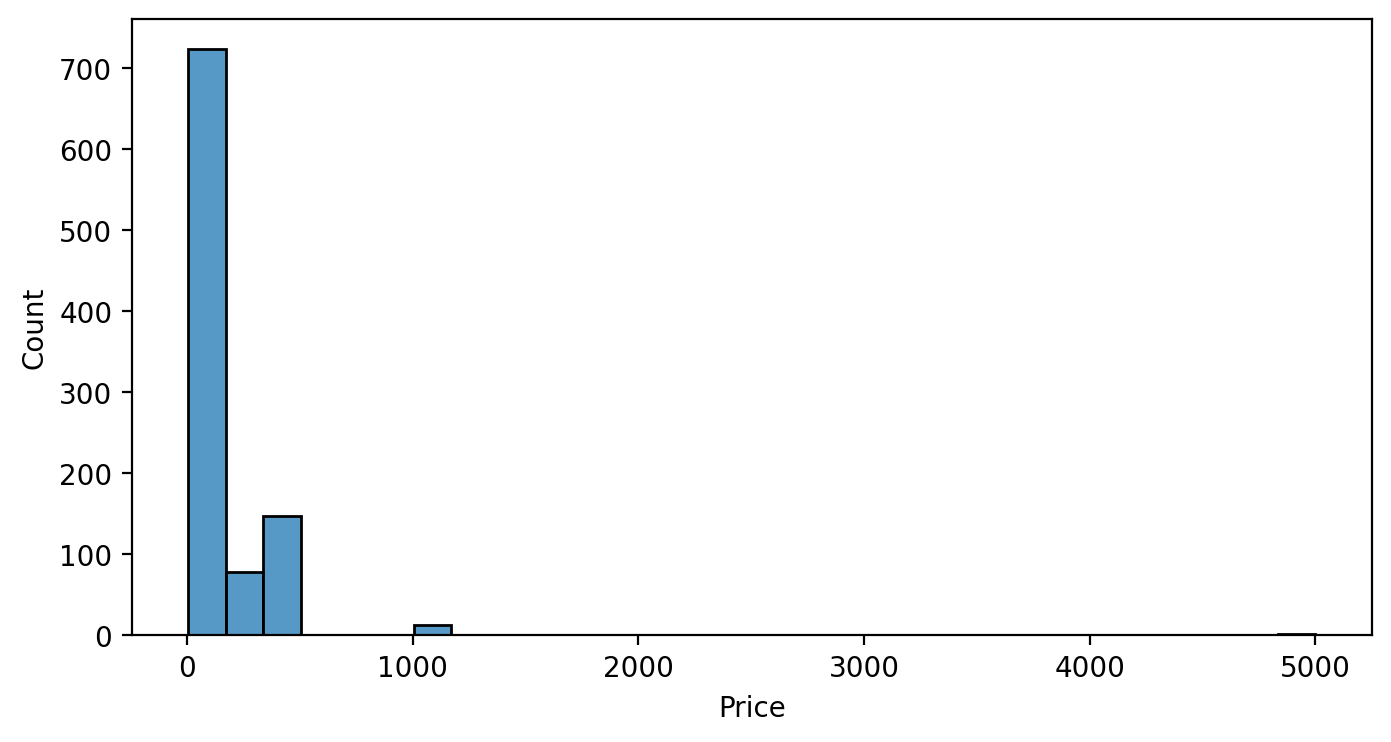

In [37]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=data,
             x=data.Price,
             bins=30,)
plt.show()

**Analyse the Total Amount of Money Spent by Organisation on Space Missions**

In [38]:
price_sum_by_org = data.groupby('Organisation').agg({'Price': pd.Series.sum})
price_sum_by_org

,Price
Organisation,
Arianespace,16345.00
Boeing,1241.00
CASC,6340.26
EER,20.00
ESA,37.00
Eurockot,543.40
ExPace,28.30
ILS,1320.00
ISRO,2177.00


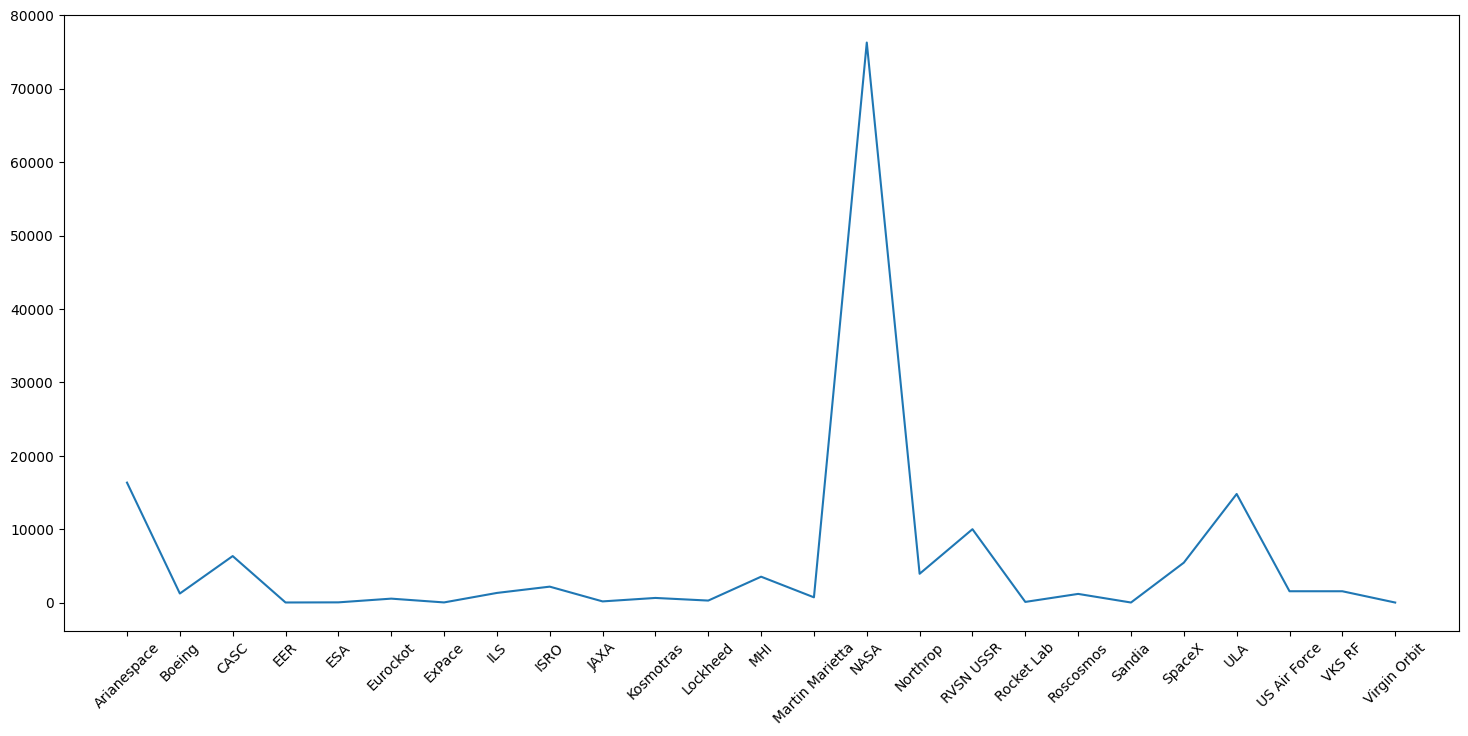

In [39]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)

plt.plot(price_sum_by_org)
plt.show()

**Analyse the Amount of Money Spent by Organisation per Launch**

In [40]:
price_avg_by_org = data.groupby('Organisation').agg({'Price': pd.Series.mean})
price_avg_by_org

,Price
Organisation,
Arianespace,170.260417
Boeing,177.285714
CASC,40.128228
EER,20.000000
ESA,37.000000
Eurockot,41.800000
ExPace,28.300000
ILS,101.538462
ISRO,32.492537


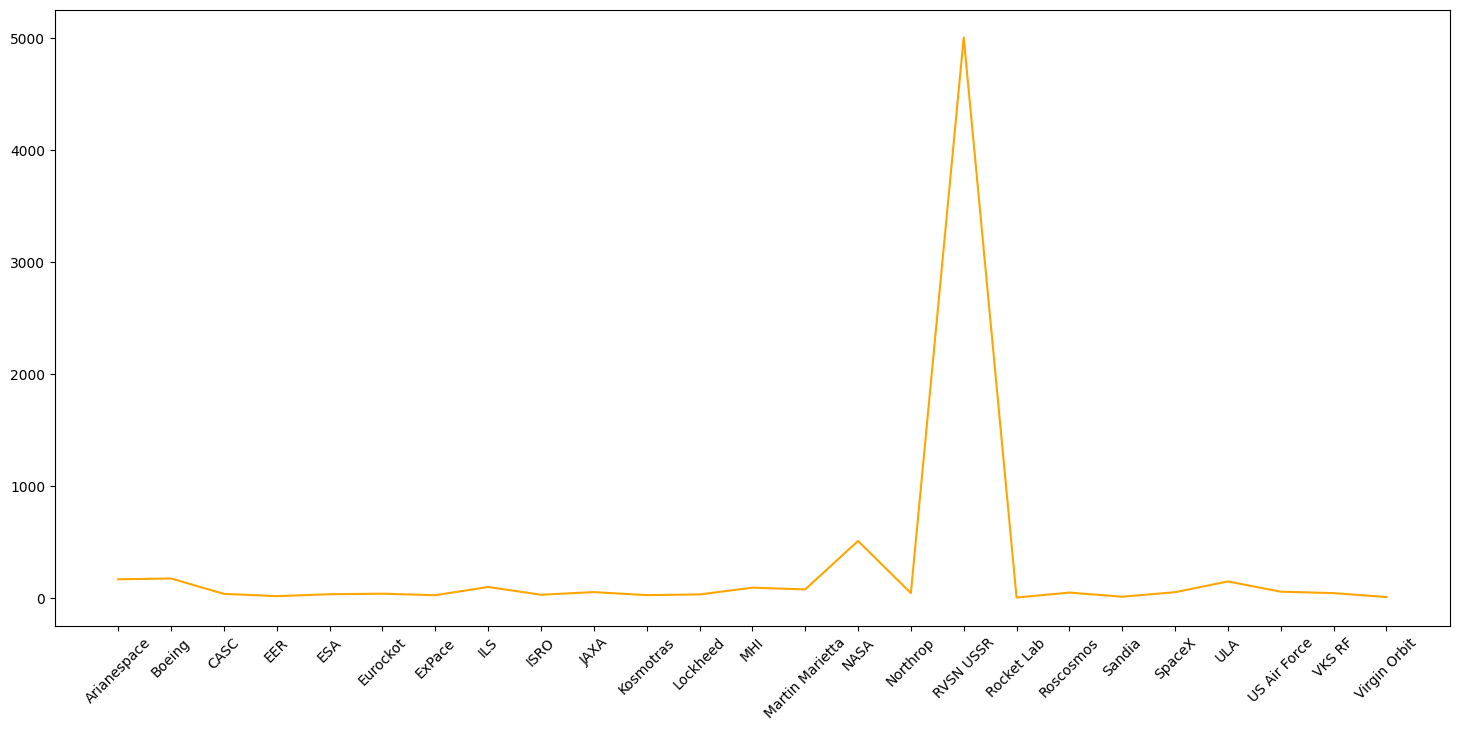

In [41]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)

plt.plot(price_avg_by_org, color='orange')
plt.show()

**Which Months are the most popular for Launches?**

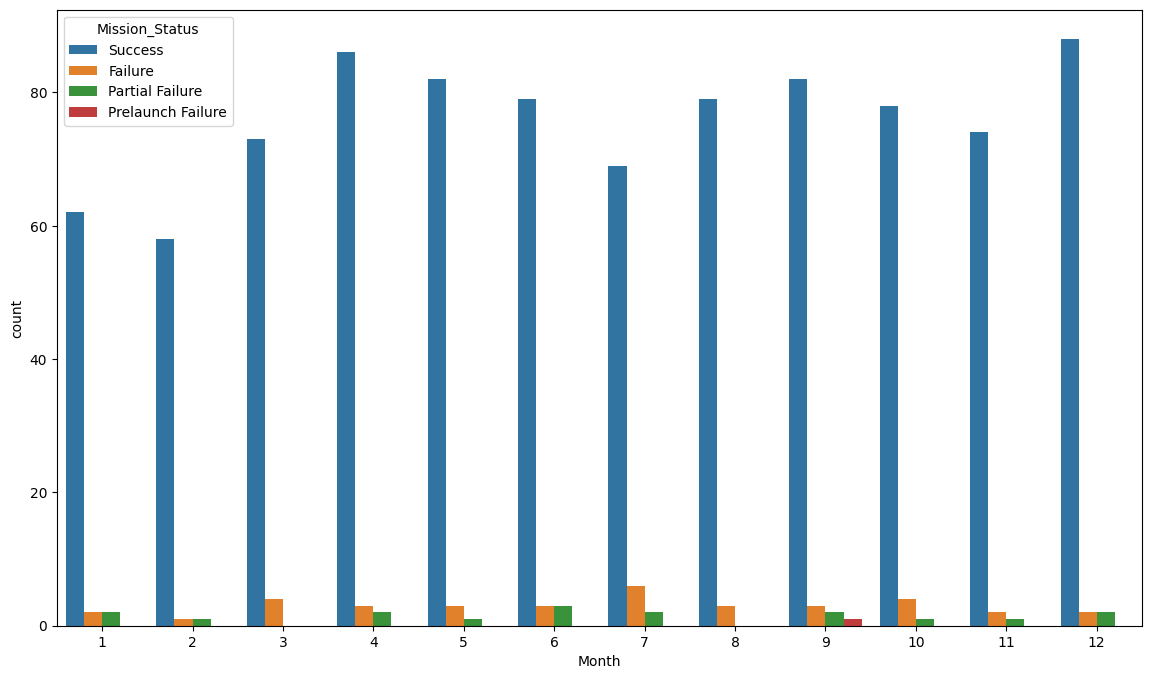

In [42]:
plt.figure(figsize=(14, 8))

sns.countplot(data=data, x='Month', hue='Mission_Status')
plt.show()

**Using a Coropleth Map to Show the Number of Launches by Country**

In [45]:
country_counts = data['Alpha3_code'].value_counts()
country_counts

USA    490
CHN    159
FRA     95
IND     67
RUS     54
KAZ     46
JPN     40
NZL     13
Name: Alpha3_code, dtype: int64

In [46]:
plt.figure(figsize=(14, 8))
fig = px.choropleth(data, locations=country_counts.index,
                    color=country_counts.values,
                    hover_name=country_counts.index,
                    color_continuous_scale="Viridis")
fig.show()

<Figure size 1400x800 with 0 Axes>

**Number of Active vs. Retired Rockets**

In [52]:
rocket_status = data['Rocket_Status'].value_counts()
rocket_status

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

In [49]:
fig = px.pie(data, names=rocket_status.index, values=rocket_status.values,
             title='Rocket Status',)
fig.update_layout()
fig.show()